In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Modulos.modulos_auxiliares import *
from scipy.spatial.distance import cdist

from bulge_size_class import *


In [2]:
# importando a img
img = plt.imread('Vaso_amao.png')
img = (1 - img).astype(np.uint8)
img = transform_rgb_to_gray(img)
#esqueletizacao
img_skel = np.array((skimage.morphology.skeletonize(img, method = 'lee')))

# grafo
graph_skeleton = creation.create_graph(im.Image(img_skel))
graph_skeleton = ad.simplify(graph_skeleton)
graph_skeleton = ad.adjust_graph(graph_skeleton, 0)

https://www.copict.ufscar.br/arquivos/edital-001-2022/roteiro-para-elaboracao-de-relatorio-parcial-de-ict.pdf

pdf do relatorio parcial

close_node keys: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
find_pixel_in 1
find_pixel_in 1
find_pixel_in 4
find_pixel_in 8
find_pixel_in 8
find_pixel_in 6
find_pixel_in 12
find_pixel_in 13
find_pixel_in 17
find_pixel_in 19
pixel outer não existe no nó 0 e na aresta 1 : (0, 1, 0)
pixel outer não existe no nó 1 e na aresta 1 : (0, 1, 0)
pixel outer não existe no nó 2 e na aresta 4 : (1, 2, 0)
pixel outer não existe no nó 3 e na aresta 8 : (3, 4, 0)
pixel outer não existe no nó 4 e na aresta 8 : (3, 4, 0)
pixel outer não existe no nó 5 e na aresta 6 : (2, 5, 0)
pixel outer não existe no nó 6 e na aresta 12 : (4, 6, 0)
pixel outer não existe no nó 7 e na aresta 13 : (5, 7, 0)
pixel outer não existe no nó 8 e na aresta 17 : (7, 8, 0)
pixel outer não existe no nó 9 e na aresta 19 : (8, 9, 0)
{5: 16.342707963801413, 3: 12.41663892376127, 2: 8.061060078010426, 7: 7.741713812377092, 10: 7.018712216325039, 14: 8.67391172596515, 9: 11.44569542078675

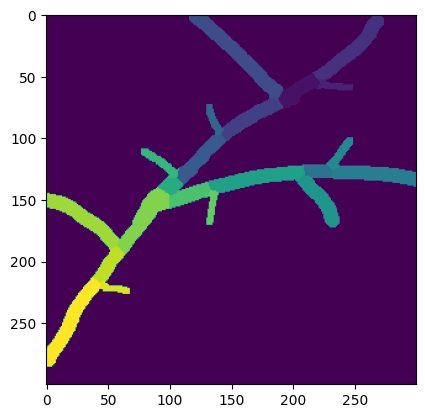

In [3]:
###%%prun
grafo = graph(graph_skeleton, img)
#print(grafo.outerlength)
print(grafo.bulge_size)
print(grafo.edges)

In [4]:
grafo.bulge_size

{5: 16.342707963801413,
 3: 12.41663892376127,
 2: 8.061060078010426,
 7: 7.741713812377092,
 10: 7.018712216325039,
 14: 8.67391172596515,
 9: 11.445695420786759,
 18: 11.813024817920464,
 11: 7.817322194551432,
 16: 8.060118686165628,
 20: 7.57296157871994,
 21: 13.577388732779973}

# Proxima semana

Fazer duas imagens novas na mao, uma com o mesmo comprimento variando o raio e outra variando o comprimento e deixando o raio fixo

Fazer uma verificação para ver se o bulgesize nao esta dividindo com none, caso o avg radius mean nao chegue a linha do vaso

Fazer um plote em consideracao do raio e o length

resgatar o codigo de gerar imagens ruidosas para fazer uma nova geração de ruidos



In [5]:
img_raio = plt.imread('varia_raio.png')
img_raio = transform_rgb_to_gray(img_raio)
img_raio = img_raio.astype(np.uint8)
print(img_raio.shape)


#esqueletizacao
img_raio_skel = np.array((skimage.morphology.skeletonize(img_raio, method = 'lee')))

# grafo
graph_skeleton_radius = creation.create_graph(im.Image(img_raio_skel))
graph_skeleton_radius = ad.simplify(graph_skeleton_radius)
graph_skeleton_radius = ad.adjust_graph(graph_skeleton_radius, 0)
img_graph = util.graph_to_img(graph_skeleton_radius, img_raio.shape)

(300, 300)


Dar uma olhada nos pixels que ficam no pixel_set e tambem se ele termina com 3 componentes conexos mesmo

tentar arrumar os valores de bulgesize que não estao chegando até o final, tambem analise para ver se esta recebendo os valores nos mesmos id's

In [6]:
%matplotlib notebook
graph_radius = graph(graph_skeleton_radius, img_raio, 100)
print(graph_radius.edges)
print(graph_radius.bulge_size)

<IPython.core.display.Javascript object>

close_node keys: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
find_pixel_in 1
find_pixel_in 1
find_pixel_in 4
find_pixel_in 6
find_pixel_in 9
find_pixel_in 11
find_pixel_in 12
find_pixel_in 14
find_pixel_in 16
(0, 9, 0) False
find_pixel_in 2
find_pixel_in 19
pixel outer não existe no nó 0 e na aresta 1 : (0, 1, 0)
pixel outer não existe no nó 1 e na aresta 1 : (0, 1, 0)
pixel outer não existe no nó 2 e na aresta 4 : (1, 2, 0)
pixel outer não existe no nó 3 e na aresta 6 : (2, 3, 0)
pixel outer não existe no nó 4 e na aresta 9 : (3, 4, 0)
pixel outer não existe no nó 5 e na aresta 11 : (4, 5, 0)
pixel outer não existe no nó 6 e na aresta 12 : (5, 6, 0)
pixel outer não existe no nó 7 e na aresta 14 : (6, 7, 0)
pixel outer não existe no nó 8 e na aresta 16 : (7, 8, 0)
pixel outer não existe no nó 9 e na aresta 3 : (0, 9, 0)
pixel outer não existe no nó 10 e na aresta 2 : (0, 10, 0)
pixel outer não existe no nó 18 e na aresta 19 : (8, 18, 0)
{(0, 1, 0):

In [7]:
plt.figure()
plt.imshow(img_raio + img_raio_skel)

<IPython.core.display.Javascript object>

In [8]:
grafo.close_node

{0: array([[ 54, 226],
        [ 53, 227],
        [ 55, 227],
        [ 59, 223],
        [ 59, 224],
        [ 60, 221],
        [ 52, 228],
        [ 60, 220],
        [ 60, 222],
        [ 59, 225],
        [ 47, 217],
        [ 59, 217],
        [ 46, 219],
        [ 60, 219],
        [ 55, 228],
        [ 46, 218],
        [ 60, 218],
        [ 47, 216],
        [ 48, 215],
        [ 45, 220]]),
 1: array([[ 68, 181],
        [ 67, 181],
        [ 66, 181],
        [ 65, 181],
        [ 69, 180],
        [ 75, 192],
        [ 76, 190],
        [ 76, 191],
        [ 75, 193],
        [ 64, 180],
        [ 60, 192],
        [ 77, 188],
        [ 77, 189],
        [ 70, 179],
        [ 61, 194],
        [ 75, 194],
        [ 60, 193],
        [ 59, 191],
        [ 75, 195],
        [ 78, 187]]),
 2: array([[ 92, 142],
        [ 97, 137],
        [ 96, 137],
        [ 92, 143],
        [ 95, 137],
        [ 94, 137],
        [ 98, 136],
        [ 91, 141],
        [ 91, 144],
       

In [9]:
img_comprimento = transform_rgb_to_gray(plt.imread('varia_comprimento.png')).astype(np.uint8)

#esqueletizacao
img_comp_skel = np.array((skimage.morphology.skeletonize(img_comprimento, method = 'lee')))

# grafo
graph_skeleton_comp = creation.create_graph(im.Image(img_comp_skel))
graph_skeleton_comp = ad.simplify(graph_skeleton_comp)
graph_skeleton_comp = ad.adjust_graph(graph_skeleton_comp, 0)
#img_graph_comp = util.graph_to_img(graph_skeleton_comp, img_comprimento.shape)

print(np.unique(img_comprimento))
plt.figure()
plt.imshow(img_comprimento)

[0 1]


<IPython.core.display.Javascript object>

In [10]:
comprimento = graph(graph_skeleton_comp, img_comprimento)
print(comprimento.bulge_size)

<IPython.core.display.Javascript object>

close_node keys: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
find_pixel_in 1
find_pixel_in 1
find_pixel_in 4
find_pixel_in 7
find_pixel_in 9
find_pixel_in 11
find_pixel_in 12
(0, 7, 0) False
find_pixel_in 2
find_pixel_in 5
find_pixel_in 13
find_pixel_in 15
find_pixel_in 14
pixel outer não existe no nó 0 e na aresta 1 : (0, 1, 0)
pixel outer não existe no nó 1 e na aresta 1 : (0, 1, 0)
pixel outer não existe no nó 2 e na aresta 4 : (1, 2, 0)
pixel outer não existe no nó 3 e na aresta 7 : (2, 3, 0)
pixel outer não existe no nó 4 e na aresta 9 : (3, 4, 0)
pixel outer não existe no nó 5 e na aresta 11 : (4, 5, 0)
pixel outer não existe no nó 6 e na aresta 12 : (5, 6, 0)
pixel outer não existe no nó 7 e na aresta 3 : (0, 7, 0)
pixel outer não existe no nó 8 e na aresta 2 : (0, 8, 0)
pixel outer não existe no nó 9 e na aresta 5 : (1, 9, 0)
pixel outer não existe no nó 13 e na aresta 13 : (5, 13, 0)
pixel outer não existe no nó 14 e na aresta 15 : (6, 14, 0)
pixel outer 

In [13]:
comprimento.comps

{0: [[(0, 136),
   (0, 135),
   (0, 134),
   (0, 133),
   (0, 132),
   (0, 131),
   (0, 130),
   (0, 129)],
  [(11, 145),
   (12, 145),
   (13, 145),
   (14, 144),
   (15, 144),
   (16, 144),
   (17, 144),
   (18, 144),
   (19, 144),
   (20, 143),
   (21, 143)],
  [(3, 123)]],
 1: [[(50, 143),
   (49, 143),
   (48, 143),
   (47, 143),
   (46, 143),
   (45, 143),
   (44, 143),
   (43, 143),
   (42, 143),
   (41, 143),
   (40, 143),
   (39, 143),
   (38, 143),
   (37, 143),
   (36, 143),
   (35, 143),
   (34, 143),
   (33, 143),
   (32, 143)],
  [(51, 122)]],
 2: [[(63, 143),
   (64, 143),
   (65, 143),
   (66, 143),
   (67, 143),
   (68, 143),
   (69, 143),
   (70, 143),
   (71, 143),
   (72, 143),
   (73, 143),
   (74, 143),
   (75, 143),
   (76, 143),
   (77, 143),
   (78, 143),
   (79, 143),
   (80, 143)],
  [(62, 122)],
  [(82, 122)]],
 3: [[(114, 143),
   (113, 143),
   (112, 143),
   (111, 143),
   (110, 143),
   (109, 143),
   (108, 143),
   (107, 143),
   (106, 143),
   (105, 14